**Mount The Drive**



In [55]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Read and Show Tha Dataset**

In [56]:
import pandas as pd

In [57]:
#Read Dataset from Drive
titanic = pd.read_csv('gdrive/My Drive/10th Semester/AI Lab/Lab Assignment/titanic.csv')

In [58]:
#Show Dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
#Dataset Information
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
#Null Value in Dataset
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Import Library for Data Visualization**

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

**Create Function to See the Graph**

In [62]:
def bar_chart(feature):
  survived = titanic[titanic['Survived']==1][feature].value_counts()
  dead = titanic[titanic['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived,dead])
  df.index = ['Survived','Dead']
  df.plot(kind='bar',stacked = True, figsize=(10,5))

**Find The Title from Name Column**



In [63]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
#Find The Title from Name Column
titanic_data = [titanic]
for dataset in titanic_data:
  dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand =False)

In [65]:
titanic['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Sir           1
Jonkheer      1
Lady          1
Don           1
Countess      1
Capt          1
Ms            1
Mme           1
Name: Title, dtype: int64

**Maping Name Title into Number**

In [66]:
title_mapping = {"Mr":1,"Mrs":2,"Miss":3,
                 "Master":4,"Dr":4,"Rev":4,"Mlle":4,"Major":4,"Col":4,"Capt":4,"Lady":4,"Ms":4,"Countess":4,"Mme":4,"Don":4,"Sir":4,"Jonkheer":4}

In [67]:
for dataset in titanic_data:
  dataset['Title'] = dataset['Title'].map(title_mapping)

In [68]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


**Drop Unnecessary Column (Name)**

In [69]:
titanic.drop('Name',axis=1,inplace=True)

In [70]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1


**Maping Sex Columns into Number**

In [71]:
sex_mapping = {"male":1,"female":2}
for dataset in titanic_data:
  dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [72]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,2,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,2,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,1


**Missing Value Fill Up of Age**

In [73]:
titanic["Age"].fillna(titanic.groupby("Title")["Age"].transform("median"),inplace=True)

In [74]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

**Different Age Divide in Catagorial Data**

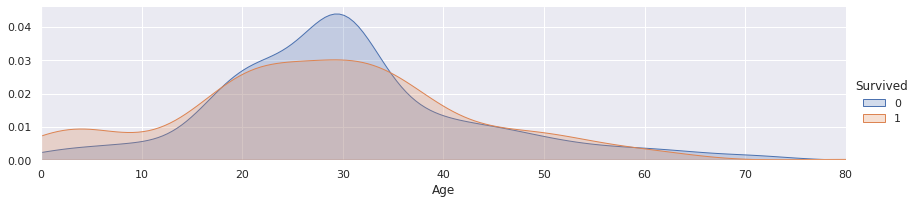

In [75]:
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0,titanic['Age'].max()))
facet.add_legend()
plt.show()

**Survived People By Age Limit**

(0.0, 30.0)

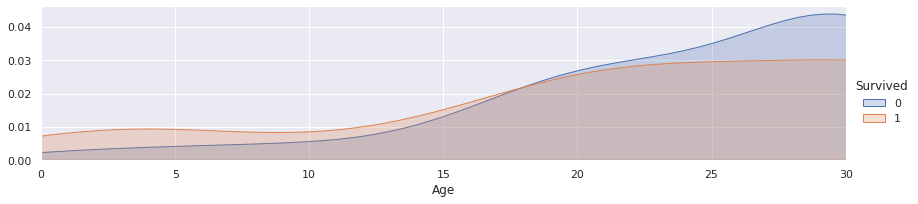

In [76]:
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0,titanic['Age'].max()))
facet.add_legend()
plt.xlim(0,30)

**Mapping Age Column**

In [77]:
for dataset in titanic_data:
  dataset.loc[dataset['Age']<=18, 'Age'] = 1
  dataset.loc[(dataset['Age']>18) & (dataset['Age']<=30), 'Age'] = 2
  dataset.loc[(dataset['Age']>30) & (dataset['Age']<=50), 'Age'] = 3
  dataset.loc[dataset['Age'] >50, 'Age'] = 4

In [78]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,2.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,2,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,2,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,2,3.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,3.0,0,0,373450,8.0500,NaN,S,1


**Missing Value Fill Up of Embarked**

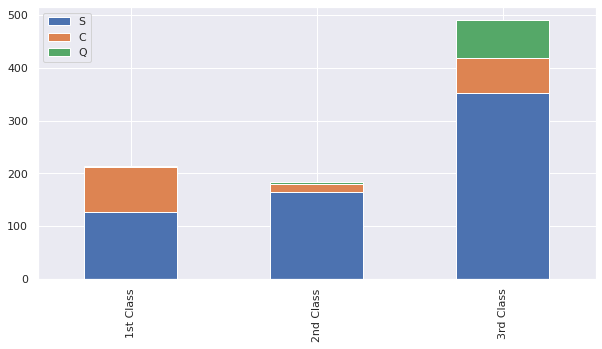

In [79]:
Pclass1 = titanic[titanic['Pclass']==1]['Embarked'].value_counts()
Pclass2 = titanic[titanic['Pclass']==2]['Embarked'].value_counts()
Pclass3 = titanic[titanic['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st Class','2nd Class','3rd Class']
df.plot(kind = 'bar', stacked = True, figsize=(10,5))

In [80]:
for dataset in titanic_data:
  dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [81]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

**Mapping Embarked Column**

In [82]:
embarked_mapping = {"S":1,"C":2,"Q":3}
for dataset in titanic_data:
  dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [83]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,2.0,1,0,A/5 21171,7.2500,NaN,1,1
1,2,1,1,2,3.0,1,0,PC 17599,71.2833,C85,2,2
2,3,1,3,2,2.0,0,0,STON/O2. 3101282,7.9250,NaN,1,3
3,4,1,1,2,3.0,1,0,113803,53.1000,C123,1,2
4,5,0,3,1,3.0,0,0,373450,8.0500,NaN,1,1


**Different Fare Divide in Catagorial Data**

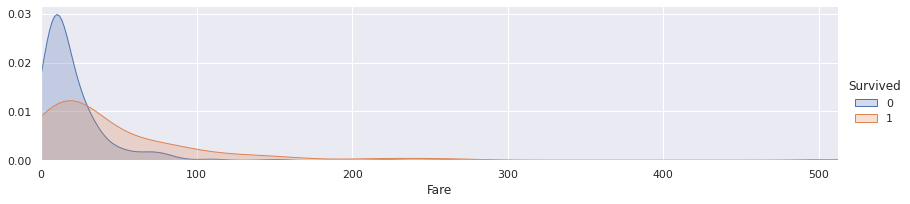

In [84]:
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0,titanic['Fare'].max()))
facet.add_legend()
plt.show()

**Survived People By Fare Limit**

(0.0, 20.0)

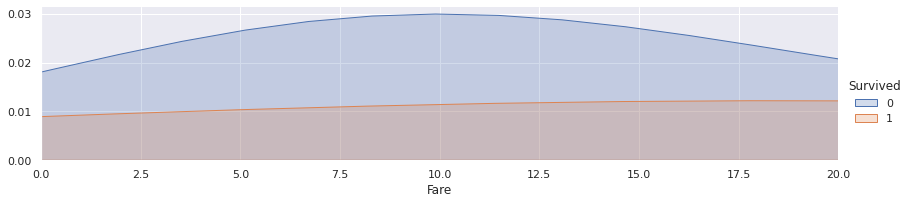

In [85]:
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0,titanic['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)

**Mapping Fare Column**

In [86]:
for dataset in titanic_data:
  dataset.loc[dataset['Fare']<=20, 'Fare'] = 1
  dataset.loc[(dataset['Fare']>20) & (dataset['Fare']<=60), 'Fare'] = 2
  dataset.loc[(dataset['Fare']>60) & (dataset['Fare']<=100), 'Fare'] = 3
  dataset.loc[dataset['Fare'] >100, 'Fare'] = 4

In [87]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,2.0,1,0,A/5 21171,1.0,NaN,1,1
1,2,1,1,2,3.0,1,0,PC 17599,3.0,C85,2,2
2,3,1,3,2,2.0,0,0,STON/O2. 3101282,1.0,NaN,1,3
3,4,1,1,2,3.0,1,0,113803,2.0,C123,1,2
4,5,0,3,1,3.0,0,0,373450,1.0,NaN,1,1


**Drop Unnecessary Column (Ticket & Cabin)**

In [88]:
column_drop = ['Ticket','Cabin']
titanic = titanic.drop(column_drop, axis=1)

**Drop Unnecessary Column (SibSp & Parch)**

In [89]:
column_drop = ['SibSp','Parch']
titanic = titanic.drop(column_drop, axis=1)

In [90]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,1,0,3,1,2.0,1.0,1,1
1,2,1,1,2,3.0,3.0,2,2
2,3,1,3,2,2.0,1.0,1,3
3,4,1,1,2,3.0,2.0,1,2
4,5,0,3,1,3.0,1.0,1,1


**Divide The Dataset Into Two Part**

In [91]:
titanic_data = titanic.drop('Survived',axis=1)
target = titanic['Survived']
titanic_data.shape, target.shape

((891, 7), (891,))

**Splitting The Dataset into Train and Test Data**

In [92]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(titanic_data, target, test_size= .30, random_state = 42)
print("X-Train: ",xtrain.shape)
print("X-Test: ",xtest.shape)
print("Y-Train: ",ytrain.shape)
print("Y-Test: ",ytest.shape)

ytest.value_counts()

X-Train:  (623, 7)
X-Test:  (268, 7)
Y-Train:  (623,)
Y-Test:  (268,)


0    157
1    111
Name: Survived, dtype: int64

**Training and Testing the Dataset**

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
y_predict = dt.predict(xtest)

**Performance Evaluation**

In [94]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(ytest, y_predict))
print(classification_report(ytest, y_predict))

[[125  32]
 [ 36  75]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       157
           1       0.70      0.68      0.69       111

    accuracy                           0.75       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



**Overall Accuracy**

In [95]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,y_predict))

0.746268656716418


In [96]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,1,0,3,1,2.0,1.0,1,1
1,2,1,1,2,3.0,3.0,2,2
2,3,1,3,2,2.0,1.0,1,3
3,4,1,1,2,3.0,2.0,1,2
4,5,0,3,1,3.0,1.0,1,1


**Data Visualization**

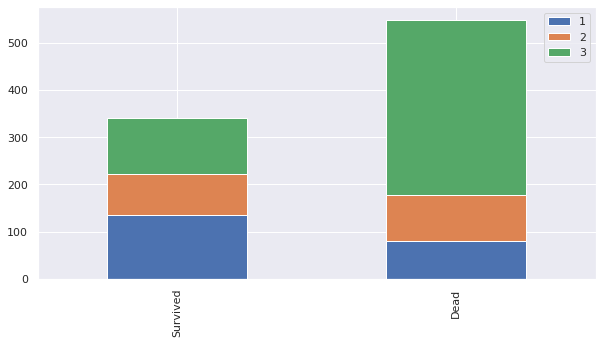

In [97]:
#Visualization of Pclass Column
bar_chart("Pclass")

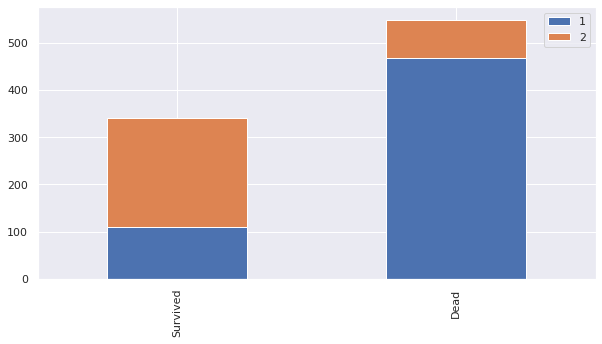

In [98]:
#Visualization of Sex Column
bar_chart("Sex")

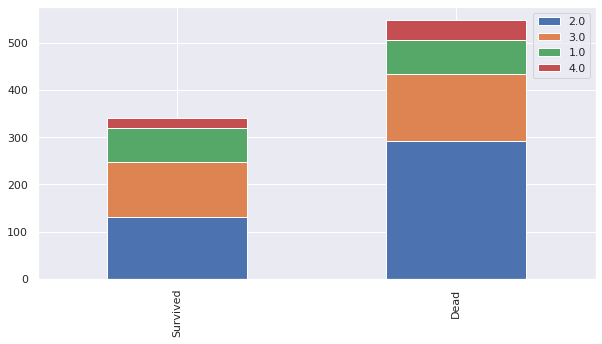

In [99]:
#Visualization of Age Column
bar_chart("Age")

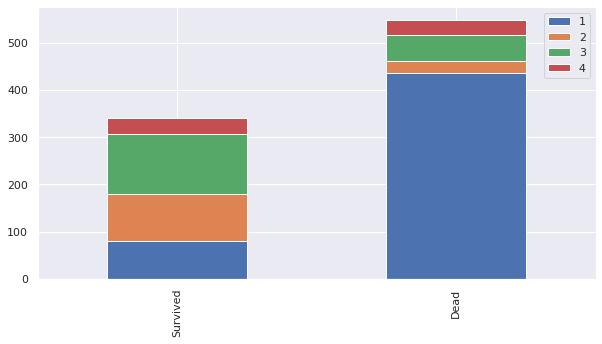

In [102]:
#Visualization of Title Column
bar_chart('Title')

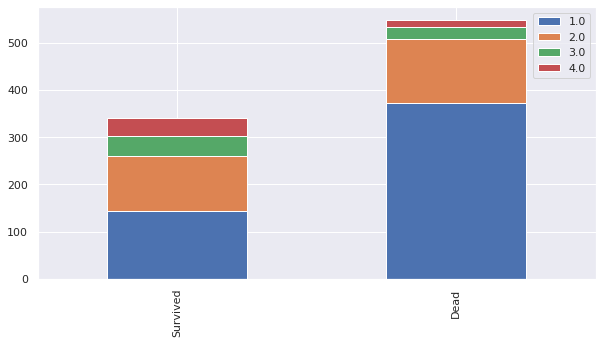

In [100]:
#Visualization of Fare Column
bar_chart("Fare")

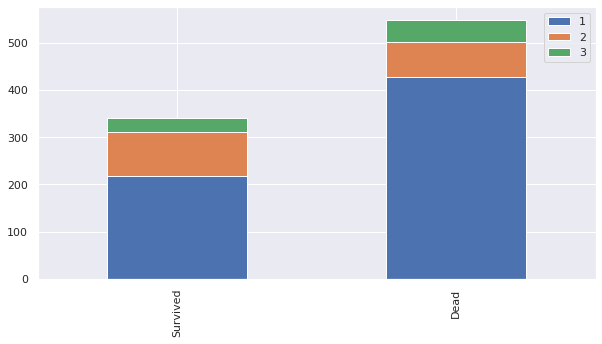

In [101]:
#Visualization of Embarked Column
bar_chart('Embarked')